### <p style="text-align: right;"> &#9989; Macy Boren
   

# __MATH323 &ndash; Introduction to Numerical Analysis &ndash; Fall 2023__

# Programming Assignment 3


In this programming assignment, you will use your programming skills to compute approximations of different quantities and investigate their errors. This gives you the opportunity to assess your understanding at this point in the course. If you need help, please come see me. I am here to support you! 

## Goals

### By the end of this assignment you will have practiced several topics, including:

1. numerical differentiation methods
2. numerical integration methods
3. the impact of round-off errors


## Instructions

You have three weeks to complete this programming assignment. You are required to use LaTeX and Python to answer the questions. The procedure to submit this assignment is available in the Jupyter notebook `slides_review_basics_programming` in Canvas and is mandatory. Note that no late assignment will be accepted. 

Work through the following assignment, making sure to follow all the directions and answer all the questions.

**This assignment is due at 3:00 p.m. Wednesday, Nov 1 on Canvas.**

## Grading

* Part 0: Preliminary (1 point)
* Part 1: Approximatin of $f'(x)$ (18 points)
    * Question 1 (5 points)
    * Question 2 (5 points)
    * Question 3 (5 points)
    * Question 4 (3 points)
* Part 2: Numerical integration (15 points)
    * Question 1 (5 points)
    * Question 2 (5 points)
    * Question 3 (5 points)
* Part 3: Development of a numerical integration formula (6 points)
    * Question 1 (3 points)
    * Question 2 (3 points)

Total points: **40**
___
___

## Part 0: Preliminary (1 point)

**Question 1**

Import in the cell below all the modules that you will need in this assignment.

In [1]:
# Put your code here 
import numpy as np
import matplotlib.pyplot as plt

## Part 1: Approximation of $f'(x)$  (18 points)

In this part, we investigate the complex second-order formula 

$$Q_{app}(h) = \frac{\Im[f(x+h\,i)]}{h}$$

approximating $f'(x)$. Here $x$ and $h$ are real numbers, and $i$ is the imaginary unit. 

As an example, consider the complex number $a = 2 + 3.2\,i$. Here the real part is $\Re[a] = 2$ and the imaginary part is $\Im[a] = 3.2$. The code in the cell below will help you understand complex numbers in Python. 

In [2]:
# we define a complex number a = 2 + 3.2i 
a = 2.0 + 3.2j # note the j directly after 3.2
print("a = ", a)
print("type of a is ", type(a))
# the real part of a is 2 
real_part_a = np.real(a)
print("the real part of a is ", real_part_a)
# the imaginary part of a is 3.2 
imaginary_part_a = np.imag(a)
print("the imaginary part of a is ", imaginary_part_a)

a =  (2+3.2j)
type of a is  <class 'complex'>
the real part of a is  2.0
the imaginary part of a is  3.2


**Question 1**

Create your own function called `Q_app` that computes $Q_{app}(h)$. The inputs of the function are the value of $x$ where we want to approximate $f'$, and a vector containing the values of $h$. The output is a vector containing the approximations $Q_{app}(h)$.

In [3]:
# Put your code here 
def Q_app(x,h):
    
    approximation_vector = np.imag(f(x + (h * 1.0j))) / h
    
    return approximation_vector

In [4]:
# Put your function for f(x) here 
def f(x):
    
    f_x = np.sin(x)/x
    
    return f_x
    

**Question 2**

Verify your function `Q_app` by performing a convergence plot. To do so, you want to estimate $f'(1)$ using $f(x) = \frac{\sin(x)}{x}$ and $h=2^{-k}$ with $k=1,\dots,25$. Plot the absolute error as a function of $h$ and verify the order of the formula $Q_{app}$. 


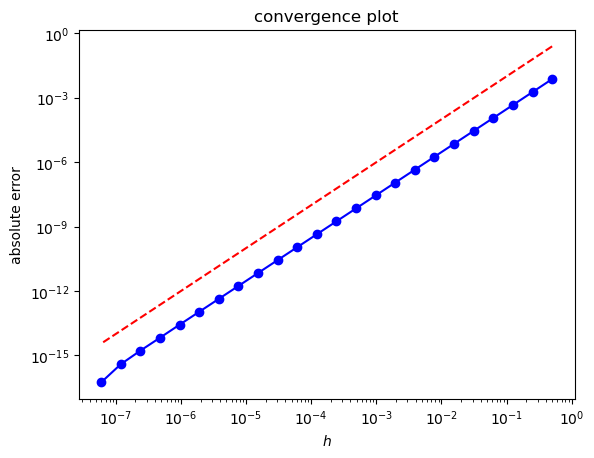

In [5]:
# Put your code here 

h_vec = np.zeros(25)   
k = np.arange(1,25,1)
h_vec = 1/(2 ** k)

approximation_vector = Q_app(1,h_vec)
exact = np.cos(1) - np.sin(1)
absolute_error  = np.abs(exact - approximation_vector)


plt.loglog(h_vec, absolute_error, color="blue", marker="o", linestyle="-")
plt.loglog(h_vec, h_vec**(2), label="$h^5$", color="red", linestyle="--")
plt.title("convergence plot")
plt.xlabel("$h$")
plt.ylabel("absolute error")
plt.show()


**Question 3**

Repeat **Question 1** and **Question 2** but consider now the second-order centered finite-difference formula 

$$\tilde{Q}_{app}(h) = \frac{f(x+h)-f(x-h)}{2h}$$

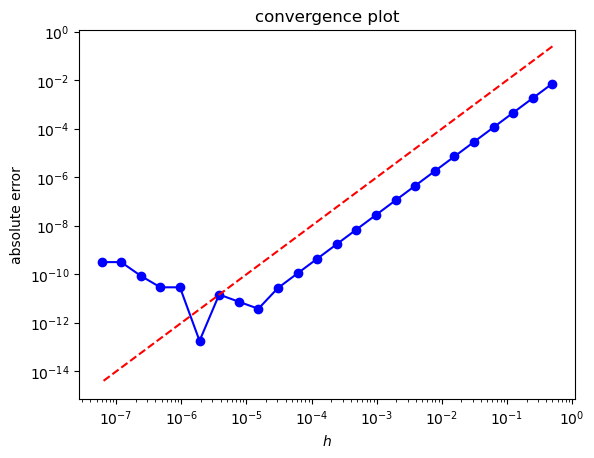

In [6]:
# Put your code here 
def Q_app(x,h):
    
    approximation_vector = (f(x+h) - f(x-h)) / (2*h)
    
    return approximation_vector

h_vec = np.zeros(25)
k = np.arange(1,25,1)
h_vec = 1/(2 ** k)

approximation_vector = Q_app(1,h_vec)
exact = np.cos(1) - np.sin(1)
absolute_error  = np.abs(exact - approximation_vector)

plt.loglog(h_vec, absolute_error, color="blue", marker="o", linestyle="-")
plt.loglog(h_vec, h_vec**(2), label="$h^5$", color="red", linestyle="--")
plt.title("convergence plot")
plt.xlabel("$h$")
plt.ylabel("absolute error")
plt.show()

**Question 4**

Describe your results and explain why the approximations obtained with $Q_{app}$ are more accurate.

<font size=6 color="#009600">&#9998;</font> 
Part 1 asks us to compare the approximations of $f'(1)$ with different functions of x, $f(x)$, and $x = 1$. 

The first 2nd order approximation is $Q_{app}(h) = \frac{\Im[f(x+h\,i)]}{h}$. It requires that we use complex numbers to form our estimation then only consider the imaginary number. Becuase the imaginary and real numbers do not effect each other, h only manipulates the imaginary part. That is why we extract the imaginary number for the approximation.

The next 2nd order approximation is $\tilde{Q}_{app}(h) = \frac{f(x+h)-f(x-h)}{2h}$. With this approximation, the function is overestimating $h$ from $x$, and underestimating  $h$ from $x$. The approximation finds the difference between these functions and divides it by 2h. This approximation is not as acurate as $Q_{app}(h)$ becuase of the large distance it needs to cover before getting an acurate estimation. 

With both of these estimations, as $h$ gets larger, $h \rightarrow 0$ and $Q_{approx}(h) \rightarrow 0$. This means that at some point our approximation will be read as 0 and the absolute error will be the exact value. 


## Part 2: Numerical integration (15 points)

In this part, you will need to choose the most appropriate method to approximate 

$$\int_0^3 f(x) \, dx$$
for different functions $f$. You can choose from the following methods:

* trapezoidal rule
* Simpson's rule
* Simpson's three-eigths rule 
* Boole's rule 
* midpoint rule 
* Gaussian quadrature with 2 points 

You are also allowed to combine these methods. As an example, you could use Simpson's rule on the interval $[0,1.5]$ and Boole's rule on the interval $[1.5, 3]$. 

For each function below, you need to justify your choice based on the accuracy of the approximation and the number of operations. 

**Question 1**

Consider the function 
$$f(x) = \ln(x)$$

In [7]:
def midpoint (f,a,b):
    h = (b-a)/(2)
    x_0 = a + h  
    approx = 2 * h * f(x_0)
    return approx  

approx = midpoint(np.log,0,3)
exact = 3*np.log(3) - 3
abs_error = np.abs(approx - exact)

print('Approximation for ln(x):')
print("Approx\t\tExact\t\tAbsolute error")
print(approx,exact,abs_error)


Approximation for ln(x):
Approx		Exact		Absolute error
1.2163953243244932 0.2958368660043291 0.920558458320164


In [8]:
# gaussian approx with 2 points

def gaussian (g,a,b):
    n = 2
    intergration_vals = np.arange(a,b+.1,1)
    
    #change of variable 
    dt = (b-a)/2
    t_1 = ( -1 * (np.sqrt(3))/3)
    t_2 = ( 1 * (np.sqrt(3))/3)
    x_1 = ((b-a)*t_1 + (a+b)) / 2
    x_2 = ((b-a)*t_2 + (a+b)) / 2
    w1 = w2 = 1 
    
    approx = (w1 * g(x_1) * dt) + (w2 * g(x_2) * dt)
    return approx

exact = 3*np.log(3) - 3
approx = gaussian(np.log,0,1) + gaussian(np.log,1,2) + gaussian(np.log,2,3)
abs_error = np.abs(approx - exact)

print('Approximation for ln(x):')
print("Approx\t\tExact\t\tAbsolute error")
print(approx,exact,abs_error)


Approximation for ln(x):
Approx		Exact		Absolute error
0.4002944312107981 0.2958368660043291 0.10445756520646898


<font size=6 color="#009600">&#9998;</font>  
First let's see if the function is defined at a. We know $f(x) = ln(x), a = 0$ and $b = 3$.
Because $f(a) = ln(0)$ and is not defined, one method to use is the open midpoint rule.

The midpoint rule is given as $$\int_a^b f(x) \, dx \approx 2hf(x_0)$$

$h$ can be found with $h = \frac{b-a}{n} = \frac{3-0}{2} = \frac{3}{2}$
and $x_0$ can be found with $x_0 = a + h = 0 + \frac{3}{2} = \frac{3}{2}$

Midpoint rule calls for $f(x)$ only one time. 

Using this method the absolute error is aproximately 0.920558.

Another method to use is Gaussian quadature with 2 points. approximation. $$\int_a^b f(x) \,\, dx \approx \sum_{i=1}^{n} w_i f(x_i)$$

In this case we must break up the intergrals into three separate integrals and add them together to find the total approximation and absolute error. The intergrals that will be used for the Gaussian quadrature with 2 points are.

\begin{equation}
        \int_{0}^1 ln(x) \,\, dx + \int_{1}^2 ln(x) \,\, dx + \int_{2}^3 ln(x) \,\,dx
\end{equation}


In order to use Gaussian guadrature we must complete a change of variable:

$$x = \frac{(b-a)t +a+b}{2} \qquad dx=\frac{b-a}{2}dt$$

We also know that for Gaussian, $w_1 = w_2 = 1$ and $t_i = \pm\frac{\sqrt3}{3}$

In my code I defined Gaussian to be with 2 points and once I found the change of variables, and computed the integrals, I was able to add up all of the intergrations to find the absolute error. Using this method we had an absolute error of approximately 0.104458.

We know that the Gaussian Quadrature at 2 points is a better approximation for $\int_0^3 ln(x) \, dx$.

This is becuase Gaussian requires less operations than the midpoint method and also calls the function $f(x)$ only one time.

**Question 2**

Consider the function 
$$f(x) = 9 + 10x - 3x^5$$

In [9]:
# Put your code here 

def f(x):
    f_x = 9 + 10*x - 3*(x**5)
    return f_x

def booles_rule(a,b):
    n = 4
    h = (b-a)/n
    x = np.arange(a,b+.1,h)
    approx = ((2*h)/45)*((7*f(x[0])) + (32*f(x[1])) + (12*f(x[2])) + (32*f(x[3])) + (7*f(x[4])))
    return approx

<font size=6 color="#009600">&#9998;</font>  *Put your answer and explanation here*

This function is 5th order, and is closed, so we are able to use Boole's Rule. We can use Booles Rule for this approximation and get an absolute error of 0. That means that if we were to find the 6th derivative, the error term would be 0. 

To show this with my code, I defined my function $f(x) = 9 + 10x - 3x^5$ and created a definition of Boole's Rule. Using this method of approximation, we see that the estimation is equal to the exact value and we have an absolute error of 0. 

Booles method requires the least number of calls of $f(x)$ and flops while still getting an absolute error of 0.


In [10]:
x = 3
exact = 9*x + (5*(x**2)) - ((x**6)/2)
approx = booles_rule(0,3)
abs_error = np.abs(approx - exact)

print('Approximation for 9x +10x -3x^5:')
print("Approx\tExact\tAbsolute error")
print(approx,exact,abs_error)


Approximation for 9x +10x -3x^5:
Approx	Exact	Absolute error
-292.5 -292.5 0.0


**Question 3**

Consider the function 
$$f(x) = \left\{
    \begin{aligned}
        \pi \qquad &\mbox{if } 0\leq x < 1 \\
        (x-1)^2+\pi \qquad &\mbox{if } 1\leq x < 2 \\
        (\pi+1)(3-x) \qquad &\mbox{if } 2\leq x \leq 3 
     \end{aligned}
     \right.$$

In [11]:
# Put your code here 

# for pi
def midpoint (f,a,b):
    n = 2
    h = (b-a)/n
    #x_0 = a + h  
    approx = 2 * h * f
    return approx  

approx_1 = midpoint(np.pi,0,1)
exact_1 = np.pi
abs_error_1 = np.abs(approx_1 - exact_1)

In [12]:
#for (x-1)^2 + pi

def f(x):
    f_x = (x - 1)**2 + np.pi
    return f_x

def simp38(a,b):
    n = 3
    h = (b-a)/n
    x = np.arange(a,b+.1,h)
    approx = ((3*h)/8) * (f(x[0]) + (3*f(x[1])) + (3*f(x[2])) + f(x[3]))
    return approx

approx_2 = simp38(1,2)
exact_2 = (3*np.pi + 1)/3
abs_error_2 = np.abs(approx_2 - exact_2)

In [13]:
#for (pi + 1)(3 - x)
def f(x):
    f_x = (np.pi + 1) * (3 - x)
    return f_x

def midpoint (a,b):
    n = 2
    h = (b-a)/n
    x_0 = a + h  
    approx = 2 * h * f(x_0)
    return approx 

approx_3 = midpoint(2,3)
exact_3 = (np.pi + 1)/2
abs_error_3 = np.abs(approx_3 - exact_3)

<font size=6 color="#009600">&#9998;</font>  

This peicewise problem requires the use of multiple methods to get the best approximation. Because $\pi$ is of degree 0 and is a constant, we can use either an open or closed method. We see that the midpoint approximation will provide the least calls to $f(x)$.

For $f(x) = (x-1)^2+\pi$ we know it is of degree 2, closed, so we can use Simpson's three-eigths rule. Again, with the least amount of calls to $f(x)$ while still getting an absolute error of 0. 

Finally for $f(x) = (\pi+1)(3-x)$ we see it is of degree 1 and closed. Because of this, trapezoidal method may seem like the best way to go but, we are not required to used a closed method. In fact if we use the open midpoint method, we see that $f(x)$ will only be called once, while if we used trapezoidal, $f(x)$ would be called twice. We are trying to find the best approximation with the lowest amount of flops so midpoint method is better.

In [14]:
print('Approximation for pi:')
print("Approx\t\tExact\t\tAbsolute error")
print(approx_1,exact_1,abs_error_1,"\n")

print('Approximation for (x-1)^2 + pi:')
print("Approx\t\tExact\t\tAbsolute error")
print(approx_2,exact_2,abs_error_2,"\n")

print('Approximation for (pi + 1)(3 - x):')
print("Approx\t\tExact\t\tAbsolute error")
print(approx_3,exact_3,abs_error_3,"\n")

Approximation for pi:
Approx		Exact		Absolute error
3.141592653589793 3.141592653589793 0.0 

Approximation for (x-1)^2 + pi:
Approx		Exact		Absolute error
3.4749259869231266 3.4749259869231266 0.0 

Approximation for (pi + 1)(3 - x):
Approx		Exact		Absolute error
2.0707963267948966 2.0707963267948966 0.0 



## Part 3: Development of a numerical integration formula (6 points)

In this part, we want to compute the points and weights of the following quadrature

$$\int_{-1}^{1} f(x) \, dx \approx I_h =  w_1 (f(-1) + f(1)) + w_2(f(-x_1)+f(x_1))$$ 

**Question 1**

Show that this quadrature integrate exactly all polynomials $x^q$ when $q$ is odd.

<font size=6 color="#009600">&#9998;</font>  
This quadrature will integrate exactly all polynomials of $x^q$ when q is odd and here is why.

Consider the function $f(x) = x^5 + 4x^3$.

The exact integration of this funtion is as follows:


\begin{equation} \begin{aligned}
f(x) =&\,\, x^5 + 4x^3\\
\int_{-1}^{1} f(x)=&\,\, \Big[\frac{1}{6}x^6 + x^4\Big]_{-1}^{1} \\
=&\,\, \frac{7}{6} - \frac{7}{6} = 0
\end{aligned} \end{equation} 

We can do the same thing but for the approximation.

\begin{equation} \begin{aligned}
I_h =&\,\, w_1 (f(-1) + f(1)) + w_2(f(-x_1)+f(x_1))\\
=&\,\,  w_1((-1)^5 + 4(-1)^3 + (1)^5 + 4(1)^3) + w_2\Big[(-x^5 - 4x^3 + x^5 + 4x^3)\Big]_{-1}^{1} \\
=&\,\, 0 + 0 = 0
\end{aligned} \end{equation} 

This shows that with this quadrature we will be able to approximate exactly polynomials of $x$ to the odd power at 0.

###### **Question 2**

Provide the system of equations to solve for $w_1$, $w_2$ and $x_1$ so that the degree of precision of $I_h$ is at least 5.

<font size=6 color="#009600">&#9998;</font>  *Put your answer here*

In order to find the approximation so the degree of precision is at least 5 we need to build our general form. We showed that the quadrature is 0 with polynomials of x to the odd power so, we are required to use the polynomials of x to the even power. 

We choose $g(x) = a_0 + a_2x^2 + a_4x^4$
then,

\begin{equation}
        \int_{-1}^1 g(x) \,\, dx = \int_{-1}^1 ( a_0x + a_2x^2 + a_4x^4) \,\, dx = a_0 \int_{-1}^1 1 \,\,dx + a_2 \int_{-1}^1 x^2 \,\,dx + a_4 \int_{-1}^1 x^4\,\,dx
\end{equation}


Now we need to determine $w_1$, $w_2$ and $x_1$. We want to intergrate exactly $p_0(x) = 1$, $p_1(x) = x^2$ and $p_2(x) = x^4$.
From here we are able to build our system of equations knowing that $I_h =  w_1 (f(-1) + f(1)) + w_2(f(-x_1)+f(x_1))$.

\begin{equation}
    \left\{
    \begin{aligned}
        \int_{-1}^1 p_0(x) \,\,dx = \int_{-1}^1 1 \,\,dx = 2 = &\,\, w_1(1 + 1) + w_2(1 + 1)  \\
        \int_{-1}^1 p_1(x) \,\,dx = \int_{-1}^1 x^2 \,\,dx = \frac{2}{3} = &\,\, w_1(1 + 1) + w_2(x^2 + x^2)\\
        \int_{-1}^1 p_1(x) \,\,dx = \int_{-1}^1 x^4 \,\,dx = \frac{2}{5} = &\,\, w_1(1 + 1) + w_2(x^4 + x^4) 
    \end{aligned}
    \right.
\end{equation}

so the system of equations will be
\begin{equation}
    \left\{
    \begin{aligned}
        1 \,\, = w_1 + w_2 \\
        \frac{1}{3} \,\, = w_1 + w_2x^2\\
        \frac{1}{5} \,\, = w_1 + w_2x^4
    \end{aligned}
    \right.
\end{equation}


### Congratulations! It is done!

Please submit your assignment on Canvas following the procedure described in the Jupyter notebook `slides_review_basics_programming`.